# Solutions for problem set 2

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import problem2_2 as p2
%matplotlib inline

In [41]:
from importlib import reload
reload(p2)

<module 'problem2_2' from '/Users/jarle/Teaching/MLD2019/ProblemSets/2 - Inference and Visualisation/Solution/problem2_2.py'>

## Problem 2

This is solved in the  problem2_2.py routine and you will find various ways to solve it.

In [3]:
tnames, data = p2.read_visualisation_data()

### 2 a)

Here we were asked to calculate 1D statistics on the data and below I show this to two decimal places. The work is done by the `get_statistics` routine. Note that while the mean and standard deviation agree, the other statistics do differ - natural since the data were optimised with only the mean and standard deviation as constraints.

You could do more here - like calculating the correlation coefficients etc - I stopped as this should be sufficient.

In [4]:
from astropy.table import Table

stats = p2.get_statistics(tnames, data)
for k in stats.keys():
    t = Table(stats[k])
    for cname in t.colnames:
        t[cname].format='0.2f'
    print("{0}\n------------".format(k))
    print(t)

x
------------
 mean median  std   25%   75%   max   min 
----- ------ ----- ----- ----- ----- -----
54.27  53.34 16.71 39.72 69.15 91.64 15.56
54.27  53.84 16.71 41.63 64.80 91.74 19.29
54.27  54.02 16.70 43.38 64.97 85.66 21.86
54.26  53.33 16.71 44.10 64.74 98.21 22.31
54.26  50.98 16.71 50.36 75.20 77.95 25.44
54.26  53.07 16.71 42.29 66.77 98.29 22.00
54.27  54.17 16.71 41.54 63.95 96.08 17.89
54.27  53.14 16.71 42.89 64.47 95.59 18.11
54.27  54.26 16.71 42.81 64.49 95.26 20.21
54.27  56.53 16.71 41.03 68.71 86.44 27.02
54.27  50.36 16.71 49.96 69.50 89.50 30.45
54.27  64.55 16.71 35.52 67.45 77.92 27.44
54.26  47.14 16.71 40.09 71.86 85.45 31.11
y
------------
 mean median  std   25%   75%   max   min 
----- ------ ----- ----- ----- ----- -----
47.83  47.54 26.84 24.63 71.80 97.48  0.02
47.83  47.38 26.84 26.24 72.53 85.88  9.69
47.84  51.03 26.84 18.35 77.78 85.58 16.33
47.83  46.03 26.84 25.29 68.53 99.49  2.95
47.84  51.30 26.84 17.11 82.88 94.25 15.77
47.83  50.47 26.84 30.48

### 2 b)

Comparing the datasets in 2D is done with the `show_visualisations_multipanel` routine. It does nothing fancy, but it does not seem to be necessary to do much more.

Axes shape= (3, 5)


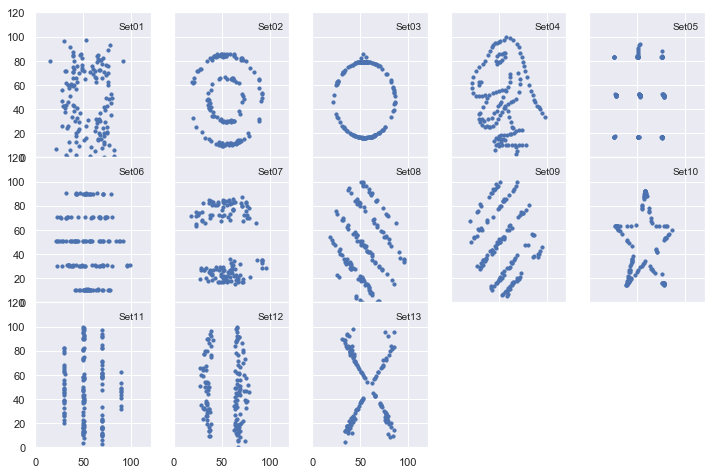

In [5]:
p2.show_visualisations_multipanel(tnames, data)

### 2 c)

The final question is whether the data differ in 1D plots. This has many approaches. Here is an example using simple boxplots and as you will see this is already hinting that something is a bit off. And then I repeat this with a violin plot.

In [42]:
df = p2.data_to_pandas_df(tnames, data)

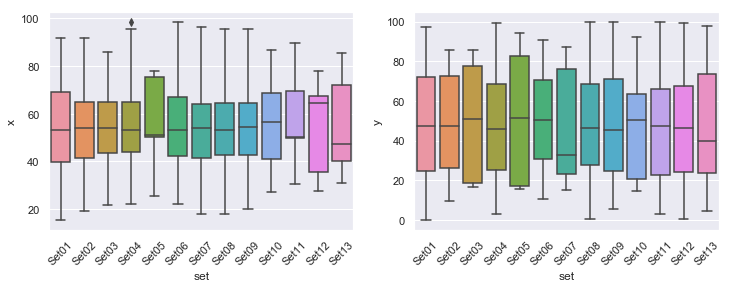

In [51]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 4))
bax = sns.boxplot(y='x', x='set', data=df, ax=ax[0])
bax.set_xticklabels(bax.get_xticklabels(), rotation=45)
bax = sns.boxplot(y='y', x='set', data=df, ax=ax[1])
dum = bax.set_xticklabels(bax.get_xticklabels(), rotation=45)

/Users/jarle/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


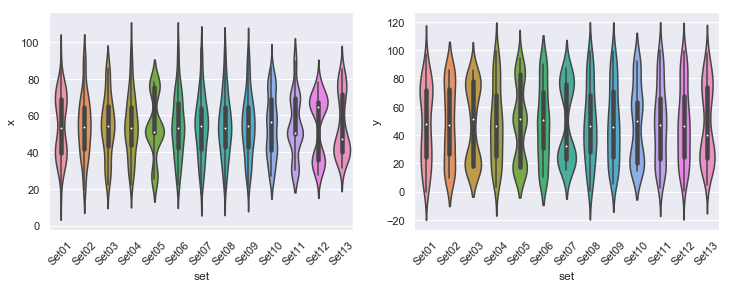

In [52]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 4))
bax = sns.violinplot(y='x', x='set', data=df, ax=ax[0])
bax.set_xticklabels(bax.get_xticklabels(), rotation=45)
bax = sns.violinplot(y='y', x='set', data=df, ax=ax[1])
dum = bax.set_xticklabels(bax.get_xticklabels(), rotation=45)

# Problem 3

The `problem3.py` file contains the code for the solution of this problem. Note that this focuses on the Bayesian MCMC part. The maximum likelihood code is in `ml_illustration.py` - which also contains the code that generates the dataset and pickles it. Thus 3b) is solved in that file.

In [68]:
import problem3 as p3
reload(p3)

<module 'problem3' from '/Users/jarle/Teaching/MLD2019/ProblemSets/2 - Inference and Visualisation/Solution/problem3.py'>

In [127]:
d = p3.load_data()

In [57]:
# See ml_illustration for the run_ml() function that calculates these numbers.
ml_solution = {'x': [0.28233725, 1.31299656]}
sampler_lin, samples_lin = p3.run_emcee(d['x'], d['y_true'], d['y'], d['sigma'], ml_solution)

### Show the chains

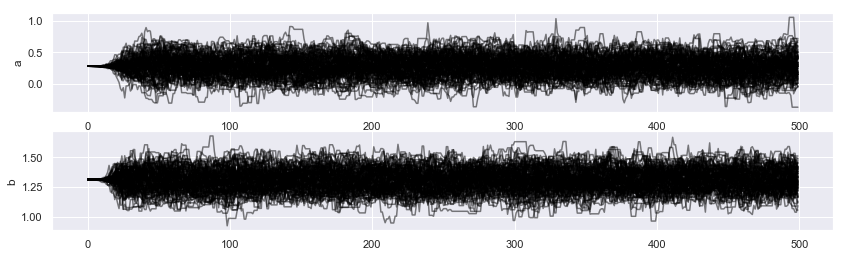

In [66]:
fig, axes = p3.show_walkers(sampler_lin.chain, ['a', 'b'])

### Show a corner plot

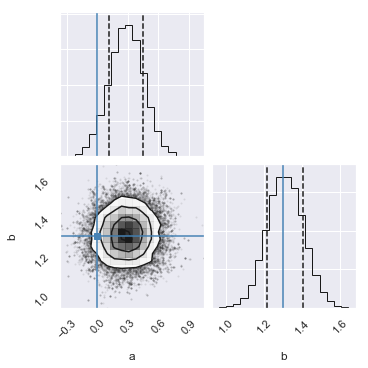

In [70]:
fig = p3.show_corner_plot(samples_lin)

# Problem 4

This is a more involved problem and the execution of the integration for the Bayes factor is time-consuming.

In [148]:
import problem4 as p4
reload(p4)

<module 'problem4' from '/Users/jarle/Teaching/MLD2019/ProblemSets/2 - Inference and Visualisation/Solution/problem4.py'>

### 4 a)

To read in the data I use `astropy.table` and then I plot it simply using the error bar routine in `matplotlib`. The one annoying bit there is that to remove the connecting lines you need to specify a format. Bad design in my opinion but unlikely to ever change. Note that I also create a list, `data`, which contains the data in a different format because I had some older code that preferred this and it was easier for me. 

In [71]:
from astropy.table import Table

In [112]:
t = Table().read('../../../Datafiles/data-for-poly-test.vot')
data = [t['x'].filled().data, t['y'].filled().data, t['sigma_y'].filled().data]

Text(0, 0.5, 'y')

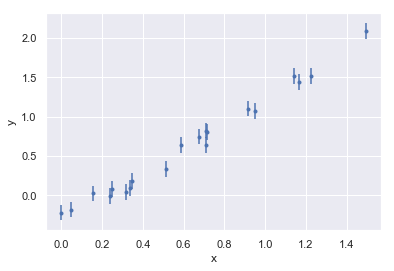

In [113]:
plt.errorbar(t['x'], t['y'], t['sigma_y'], fmt='.')
plt.xlabel('x')
plt.ylabel('y')

### 4 b)

To calculate the maximum likelihood solution for polynominals one can use polyfit to calculate the best fitting polynomial and then evaluate the likelihood at the result. This is cheating a bit and the maximum likelihood code in problem 3 can also be used for this instead.

In [87]:
res = p4.comparison_fits(data)

/Users/jarle/anaconda3/lib/python3.6/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


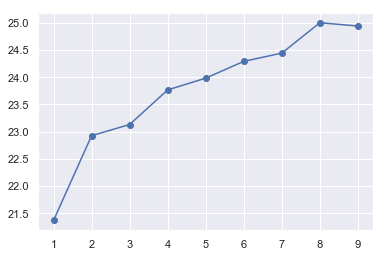

In [89]:
plt.plot(res['degrees'], res['logL_max'], marker='o')

This shows as expected that the likelihood increases pretty much monotonously with the degree. Thus this is not a good way to do it.

We can also compare the fits and see how bad it can get with a high dimensional polynominal:

/Users/jarle/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


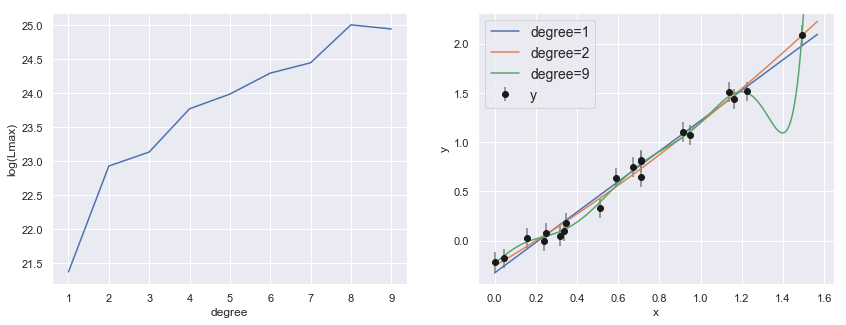

In [90]:
p4.plot_fit_comparison(data, res)

### 4 c)

To calculate BICs and AICs we use the likelihood results from 4 b).

/Users/jarle/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


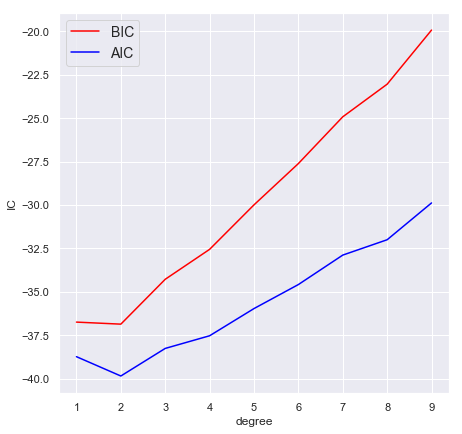

In [91]:
p4.plot_BIC_AIC(data, res)

### 4 d)

The MCMC run is done in the `run_MCMC` function. It requires the degree that you want to fit as input and carries out emcee. These runs take a few seconds on my laptop - yours might differ.

In [158]:
# First linear
trace_lin, lnprob_lin, sampler_lin = p4.run_MCMC(1, data)

In [159]:
# Then quad
trace_quad, lnprob_quad, sampler_quad = p4.run_MCMC(2, data)

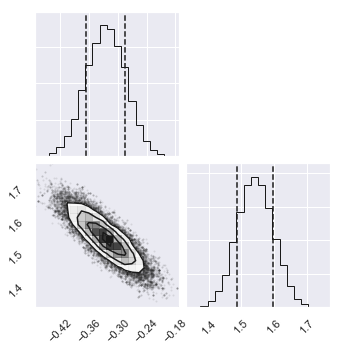

In [164]:
fig = p4.show_corner_plot(trace_lin)

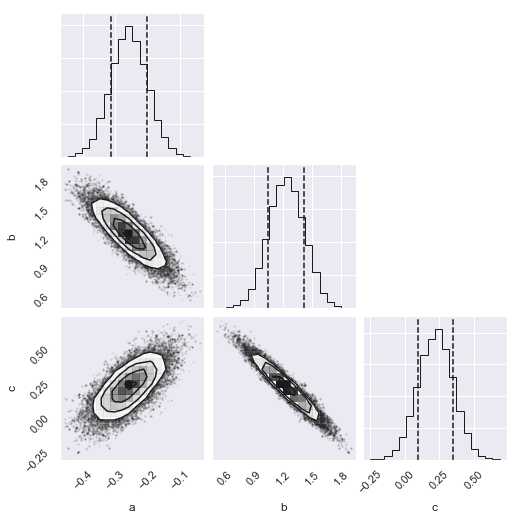

In [165]:

fig = p4.show_corner_plot(trace_quad, labels=['a', 'b', 'c'])

In [166]:
columns = [r'$\theta_{0}$'.format(i) for i in range(3)]
df_3D = pd.DataFrame(trace_quad, columns=columns[:3])

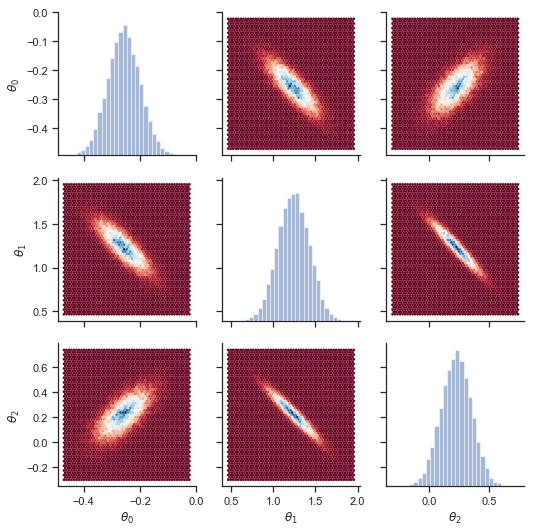

In [169]:
with sns.axes_style('ticks'):
    grid = sns.PairGrid(df_3D)
    grid.map_diag(plt.hist, bins=30, alpha=0.5)
    grid.map_offdiag(plt.hexbin, gridsize=50, linewidths=0, cmap='RdBu')

### 4 e)

The integration of the posterior is the most time-consuming step here and can take a fair while which is why this is also commented out here. The code is 

In [170]:
xlim, ylim = zip(trace_lin.min(0), trace_lin.max(0))
print("X integration limits: {0}".format(xlim))
print("Y integration limits: {0}".format(ylim))

X integration limits: (-0.47275518540600747, -0.17317616489358983)
Y integration limits: (1.33039618414352, 1.7709062125605972)


In [171]:
Z_1, dZ_1 = p4.integrate_posterior_2D(p4.ln_posterior, xlim, ylim, data)
print("Z1={0} +/- {1}".format(Z_1, dZ_1))

Z1=363.67541387253596 +/- 5.128573906200418e-06


In [172]:
xlim, ylim, zlim = zip(trace_quad.min(0), trace_quad.max(0))
Z_2, dZ_2 = p4.integrate_posterior_3D(p4.ln_posterior, xlim, ylim, zlim, data)
print("Z2={0} +/- {1}".format(Z_2, dZ_2))

Z2=2.7923882494304597 +/- 8.131882953121838e-07


In [173]:
print("Bayes factor:", Z_2 / Z_1)

Bayes factor: 0.007678243133612435


So the result is somewhat different from the blog post linked but that is because the data are slightly different. You can use the data there to see if you can recreate everything he finds. In this case, the linear model is clearly preferred over the quadratic.

# Problem 5

This is in `problem5.py` and can be executed as `python problem5.py` and will then show the result of running `knn_regress` on the data. 

For c) the answer is that the time scales as $\propto N^2$. 

For d) you can just create a dataset and run it various ways with more and more data included.